# Movies EDA - Assignment 1
You will perform an exploratory analysis to better understand the shape & structure of the data, investigate initial questions, and develop preliminary insights. Your final submission will be a python notebook consisting of visualizations that convey key insights gained during your analysis.

High-Level Question: 
- What factors drive the box office success of motion pictures?
- How do films fare in the U.S. vs. worldwide markets?
- Do producers strategize release dates for certain kinds of films?
- How do fan favorites and critical darlings relate to ticket sales?

1. First, you should try to understand the dataset. What variables does the dataset have? How are they distributed? Are there any notable data quality issues? Are there any surprising relationships among the variables? 

2. For each question, start by creating visualizations that might provide a useful answer. Then refine the visualization (by adding additional variables, changing sorting or axis scales etc.) to develop better perspectives, and explore unexpected observations, You should repeat this process for each of your question, but feel free to revise your questions or branch off to explore new questions if the data warrants.

**Dataset** <br>
This dataset contains statistics for a sample of **3,201 movies** collected in **2010**. The data includes movie titles, genres, and box office gross revenues, as well as audience (IMDB) and critic (Rotten Tomatoes) ratings. The dataset combines data from multiple sources: Rotten Tomatoes, The Numbers, and IMDB.

In [1]:
import movies as mv

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

## Checking Out the Data

US Gross and Worldwide Gross were loaded as objects Practically they should be floats. On investigation I have found that N/A values are stored as 'Unknown'. Hence, setting Unknown as NA.

In [3]:
movies_raw = pd.read_csv('movies.csv', na_values='Unknown')
movies_raw.head(3)

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time (min),Distributor,Source,Major Genre,Creative Type,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
0,The Land Girls,146083.0,146083.0,NaN,8000000.0,12-Jun-98,R,NaN,Gramercy,NaN,NaN,NaN,NaN,NaN,6.1,1071.0
1,"First Love, Last Rites",10876.0,10876.0,NaN,300000.0,7-Aug-98,R,NaN,Strand,NaN,Drama,NaN,NaN,NaN,6.9,207.0
2,I Married a Strange Person,203134.0,203134.0,NaN,250000.0,28-Aug-98,NaN,NaN,Lionsgate,NaN,Comedy,NaN,NaN,NaN,6.8,865.0


In [4]:
pd.set_option('display.float_format', lambda x: '%.5f' % x) # to suppress scientific notation in Pandas

movies_raw.describe()

,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Running Time (min),Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
count,3194.00000,3194.00000,564.00000,3200.00000,1209.00000,2321.00000,2988.00000,2988.00000
mean,44002085.16374,85343400.14152,34901546.81738,31069171.44844,110.19355,54.33692,6.28347,29908.64458
std,62555311.39066,149947342.88536,45895121.59670,35585913.44464,20.17101,28.07659,1.25229,44937.58234
min,0.00000,0.00000,618454.00000,218.00000,46.00000,1.00000,1.40000,18.00000
25%,5493221.25000,8031285.25000,9906210.75000,6575000.00000,95.00000,30.00000,5.60000,4828.50000
50%,22019465.50000,31168926.50000,20331557.50000,20000000.00000,107.00000,55.00000,6.40000,15106.00000
75%,56091761.50000,97283797.00000,37794215.75000,42000000.00000,121.00000,80.00000,7.20000,35810.50000
max,760167650.00000,2767891499.00000,352582053.00000,300000000.00000,222.00000,100.00000,9.20000,519541.00000


In [5]:
movies_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 16 columns):
Title                     3200 non-null object
US Gross                  3194 non-null float64
Worldwide Gross           3194 non-null float64
US DVD Sales              564 non-null float64
Production Budget         3200 non-null float64
Release Date              3201 non-null object
MPAA Rating               2596 non-null object
Running Time (min)        1209 non-null float64
Distributor               2969 non-null object
Source                    2836 non-null object
Major Genre               2926 non-null object
Creative Type             2755 non-null object
Director                  1870 non-null object
Rotten Tomatoes Rating    2321 non-null float64
IMDB Rating               2988 non-null float64
IMDB Votes                2988 non-null float64
dtypes: float64(8), object(8)
memory usage: 400.2+ KB


# Understanding Features

- **Title**
- **US Gross:** Box Office Gross revenue from USA (USD) <br>
    Clarification <br>
    Source: https://www.the-numbers.com/  <br>
    Wikipedia: https://en.wikipedia.org/wiki/Box_office Gross is calculated in USD
- **Worldwide Gross:** Gross income from Worldwide (USD)
- **USA DVD Sales**
- **Production Budget** (USD)
- **Release Date**
- **MPAA Rating:** Motion Picture Association of America (MPAA) film rating system [G,PG,PG-13,R,NC-17] [7 Distinct Ratings]<br>
    More Details: https://en.wikipedia.org/wiki/Motion_Picture_Association_of_America_film_rating_system
- **Running Time (min)**
- **Distributor** [174 Distributor]
- **Source:** Base source of the movie i.e. book, Real-life event etc [18 Sources]
- **Major Genre** [12 Genres]
- **Creative Type** [9 Types]
- **Director** [550 Directors]
- **Rotten Tomatoes Rating** Critic Ratings [0 to 100]
    https://www.rottentomatoes.com/
- **IMDB Rating:** Audience ratings [0 to 10]
- **IMDB Votes**

Rows: 3201 entries, 0 to 3200 <br>
Columns: 16

# Exploratory Data Analysis

### Checking Missing Values

In [6]:
movies = movies_raw.copy()

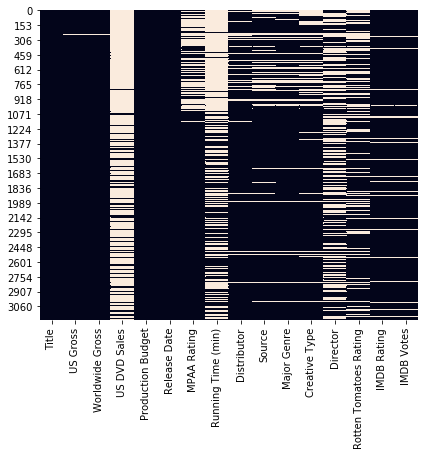

In [7]:
sns.heatmap(movies.isnull(), cbar=False)
plt.subplots_adjust(right=1, top = 1.2)

**US DVD Sales**, **Running Time** and **Director** have most of the missing values. <br>
We might need to drop these columns before modeling.

### Outliers

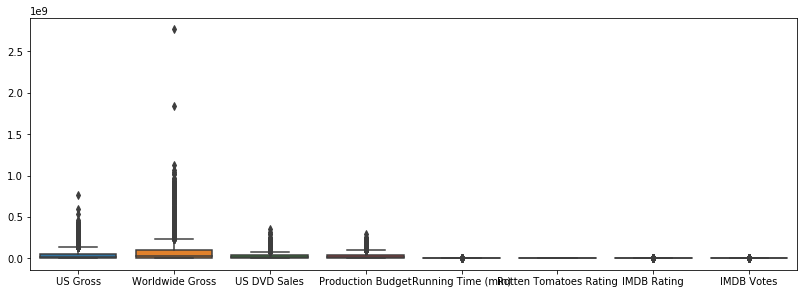

In [8]:
sns.boxplot(data=movies)
plt.subplots_adjust(right=1.9,top=1)

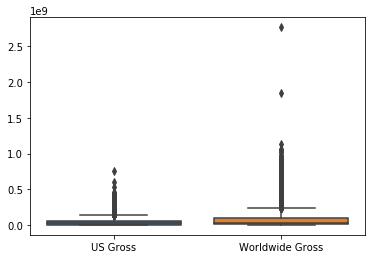

In [9]:
sns.boxplot(data=movies[['US Gross', 'Worldwide Gross']])


Some movies really rock on the Box office both in US and Worldwide with the Gross Revenue higher then rest of 75% of the movies.

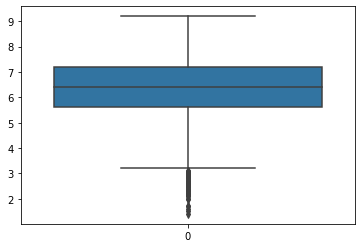

In [10]:
sns.boxplot(data=movies['IMDB Rating'])

Some Movies too much worse, we low rating then the usual.

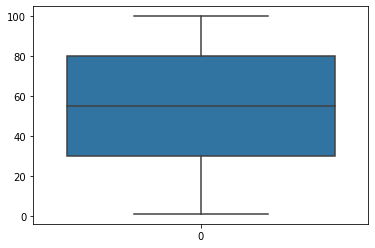

In [11]:
sns.boxplot(data=movies['Rotten Tomatoes Rating'])

Surprisingly, Rotten Tomatoes Ratings seems to very well normally distributed.

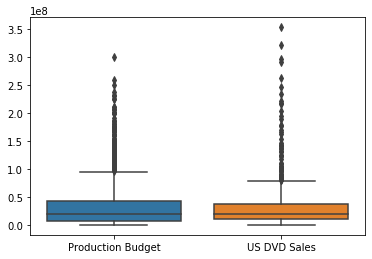

In [12]:
sns.boxplot(data= movies[['Production Budget', 'US DVD Sales']])


### Distributions and Correlation

C:\Users\malik\AppData\Local\Continuum\miniconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\malik\AppData\Local\Continuum\miniconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Saving figure pair-plot


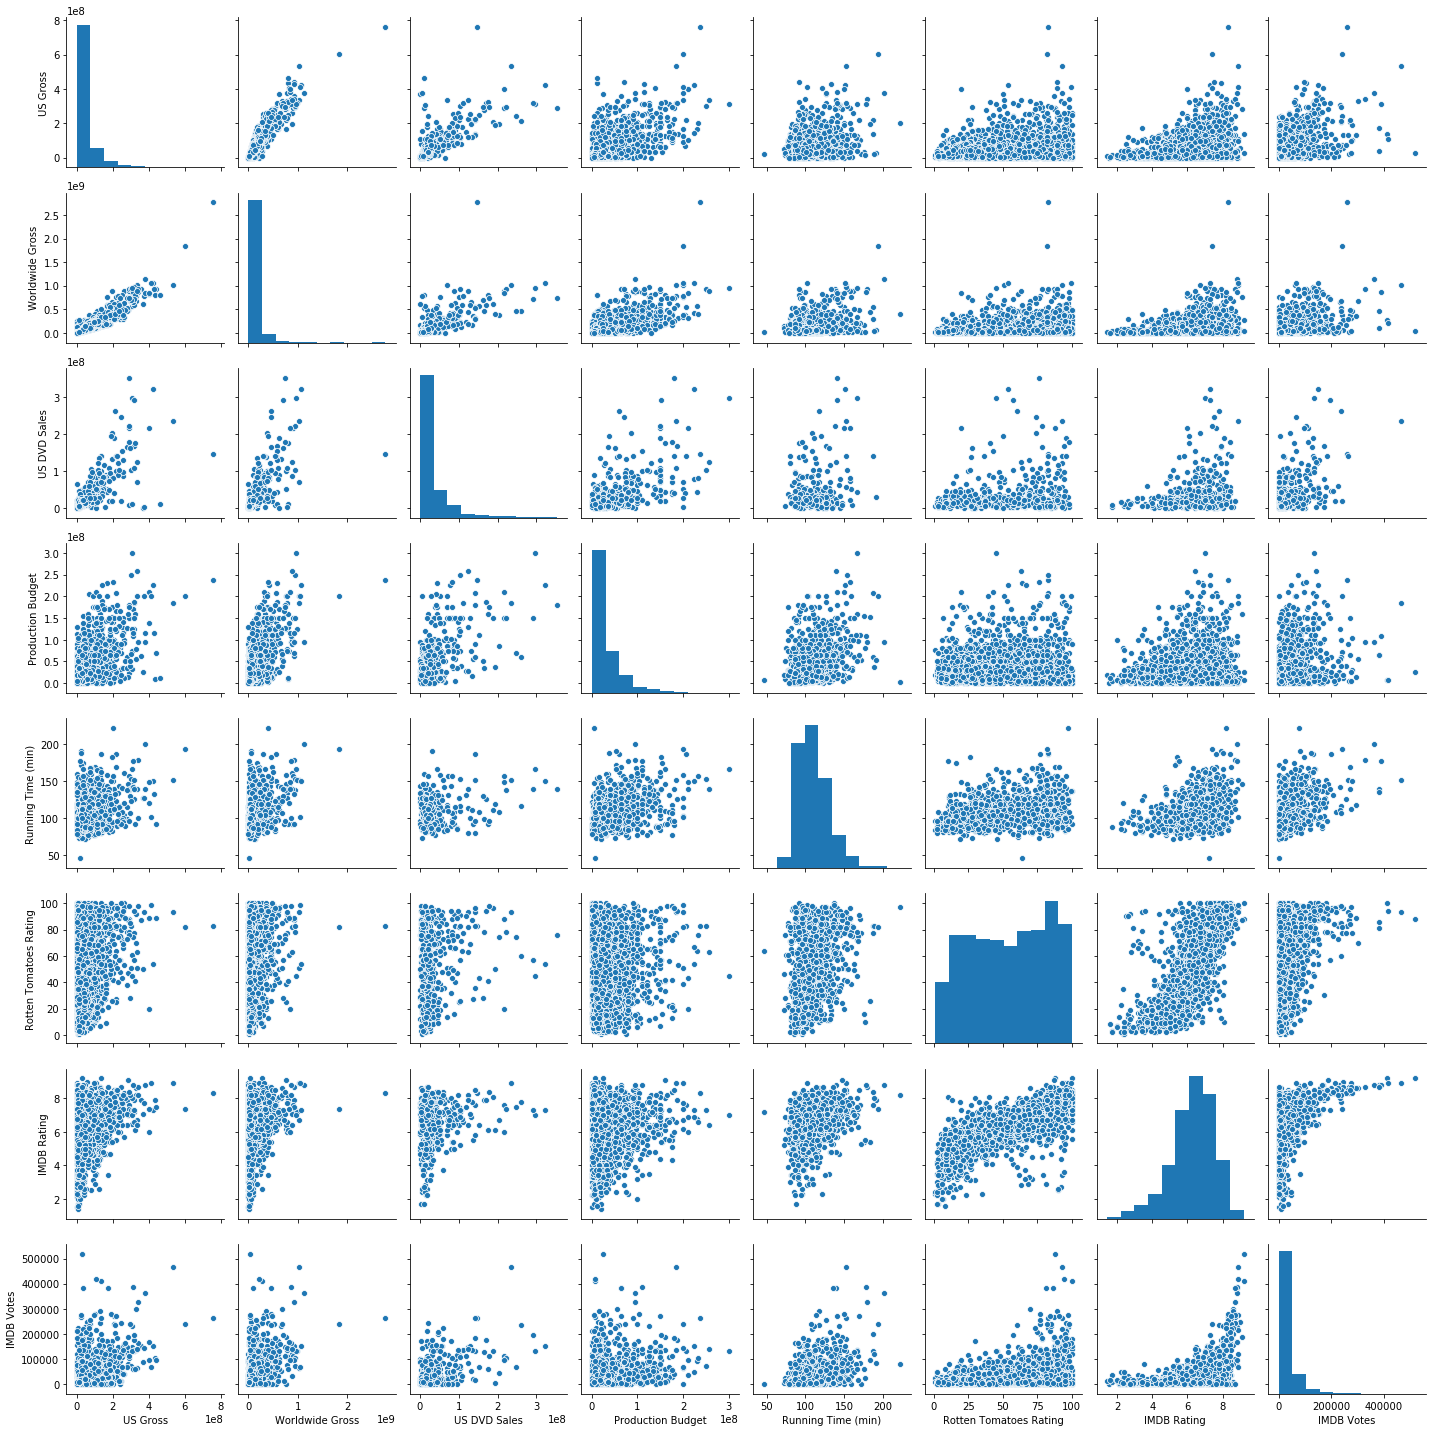

In [13]:
sns.pairplot(movies)
mv.save_fig('pair-plot')

Most of the features are skewed.

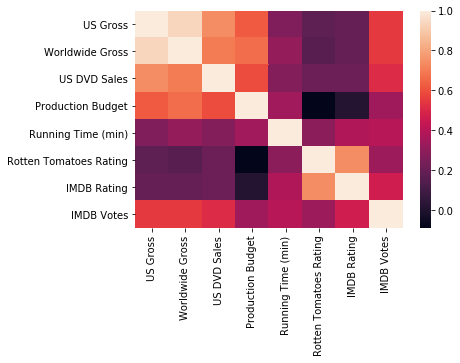

In [14]:
sns.heatmap(movies.corr())

### Variance Inflation Factor
- All numerical features

In [21]:
vif = mv.calculate_vif(movies[[ 'US Gross', 'Worldwide Gross', 'US DVD Sales',
       'Production Budget', 'Rotten Tomatoes Rating', 'IMDB Rating',
       'IMDB Votes']].dropna())

**VIF = 1: No Multicollinearity** <br>
**1 < VIF < 5: Perfectly okay** <br>
**5 < VIF: unacceptable** (some people say 5,6 even 10 no fixed cutoff Line) <br>
We rarely find data so perfect that all features have VID < 5

More on **Multicolinearity:** What most people are wondering is not 'when do we have multicollinearity' as we usually do have some.
The better question to ask is 'When can we safely ignore multicollinearity'.
Here's a great article on the topic: http://statisticalhorizons.com/multicollinearity

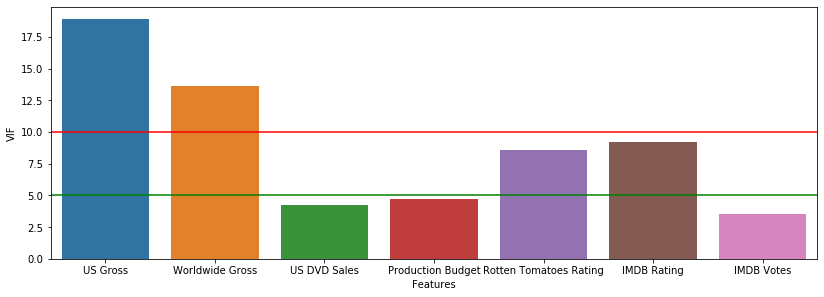

In [22]:
sns.barplot(data=vif, x = 'Features', y='VIF')
plt.subplots_adjust(right=1.9,top=1)
plt.axhline(y=5, color='g', linestyle='-')
plt.axhline(y=10, color='r', linestyle='-')


**Us Gross** and **Worldwide** have highest correlation. <br>
**Rotten Tomatoes Rating** and **IMDB Rating** also have correlation. <br>
Rest of features have no correlation.

- Lets Remove US Gross and Check Again

In [23]:
vif = mv.calculate_vif(movies[[ 'Worldwide Gross', 'US DVD Sales',
       'Production Budget', 'Rotten Tomatoes Rating', 'IMDB Rating',
       'IMDB Votes']].dropna())

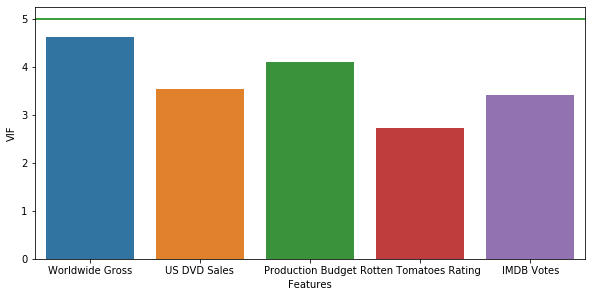

In [35]:
sns.barplot(data=vif, x = 'Features', y='VIF')
plt.subplots_adjust(right=1.4,top=1)
plt.axhline(y=5, color='g', linestyle='-')

In [ ]:
- Lets Remove IBM rating and Check Again

In [25]:
vif = mv.calculate_vif(movies[[ 'Worldwide Gross', 'US DVD Sales',
       'Production Budget', 'Rotten Tomatoes Rating',
       'IMDB Votes']].dropna())

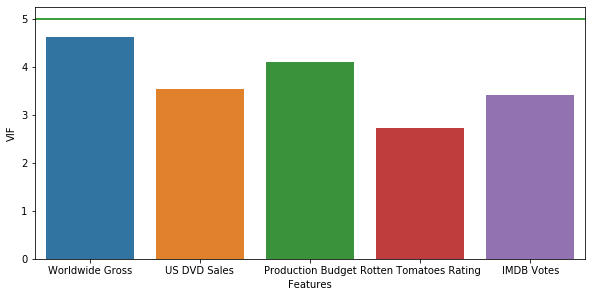

In [31]:
sns.barplot(data=vif, x = 'Features', y='VIF')
plt.subplots_adjust(right=1.4,top=1)
plt.axhline(y=5, color='g', linestyle='-')

### Linearity Check

(Can be Observed from the above pair plot Diagram)

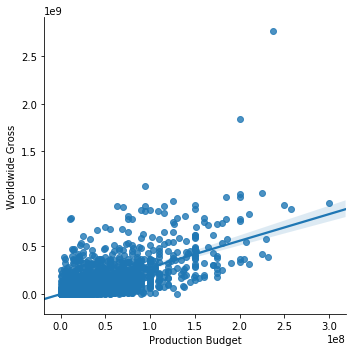

In [54]:
sns.lmplot(data=movies, x='Production Budget', y = 'Worldwide Gross')

More Production Budget, Does not necessary means more revenue.

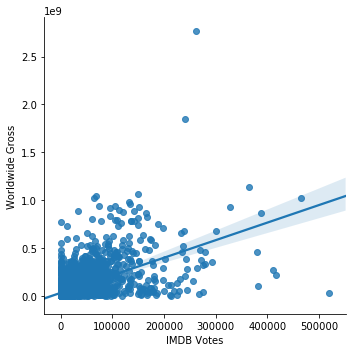

In [59]:
sns.lmplot(data=movies, x='IMDB Votes', y = 'Worldwide Gross')

Observe Rest of Features Linearity from Pair plot above.

# Categorical Varibales

MPAA Rating and Gross Worldwide:

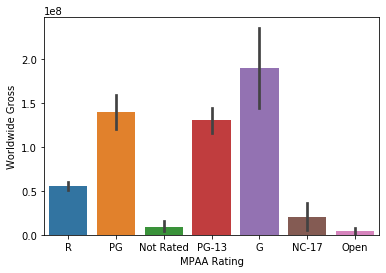

In [58]:
sns.barplot(data=movies, x='MPAA Rating', y = 'Worldwide Gross')

Ratings Description: //www.ign.com/wikis/content-ratings/MPAA <br>
G: General Audience category usually go with highest Gross Worldwide.

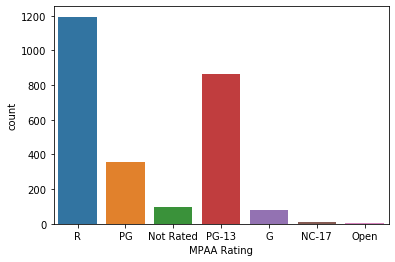

In [43]:
sns.countplot(data=movies, x='MPAA Rating')

Surprisingly, G Rating are produced less in number than R, PG-13, and PG rated movies

# What factors drive the box office success of motion pictures?

### Success
- How success is defined? <br>
  High Gross Revenue Worldwide. 